# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [876]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [877]:
# Checking the number of mice.
number_of_mice = merged_data['Mouse ID'].nunique()

In [878]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice_ids = duplicate_mice['Mouse ID'].unique()

In [879]:
# Optional: Get all the data for the duplicate mouse ID.
all_duplicate_mice_data = merged_data[merged_data['Mouse ID'].isin(duplicate_mice_ids)]

In [880]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = pd.DataFrame(merged_data).drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

In [881]:
# Checking the number of mice in the clean DataFrame.
unique_mice_ids = clean_data['Mouse ID'].unique()
number_of_mice_clean = len(unique_mice_ids)
print(f"Number of unique mice: {number_of_mice_clean}")

Number of unique mice: 249


## Summary Statistics

In [882]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen = clean_data.groupby('Drug Regimen')
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_tumor_volume = regimen['Tumor Volume (mm3)'].mean()
median_tumor_volume = regimen['Tumor Volume (mm3)'].median()
variance_tumor_volume = regimen['Tumor Volume (mm3)'].var()
std_tumor_volume = regimen['Tumor Volume (mm3)'].std()
sem_tumor_volume = regimen['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary DataFrame.
sum_tumor_volume_df = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': variance_tumor_volume,
    'Tumor Volume Standard Deviation': std_tumor_volume,
    'Tumor Volume SEM': sem_tumor_volume
})
sum_tumor_volume_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [883]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
sum_tumor_volume_df = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean = 'mean',
    Median = 'median',
    Variance = 'var',
    Std_Dev = 'std',
    SEM = 'sem'
)
# Using the aggregation method, produce the same summary statistics in a single line
sum_tumor_volume_df

,Mean,Median,Variance,Std_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

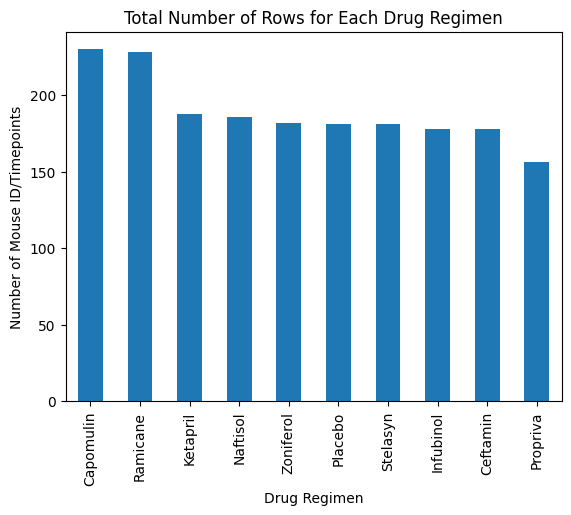

In [884]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_data['Drug Regimen'].value_counts()

regimen_counts.plot(
    kind='bar', 
    title='Total Number of Rows for Each Drug Regimen', 
    ylabel='Number of Mouse ID/Timepoints', 
    xlabel='Drug Regimen'
)
plt.show()

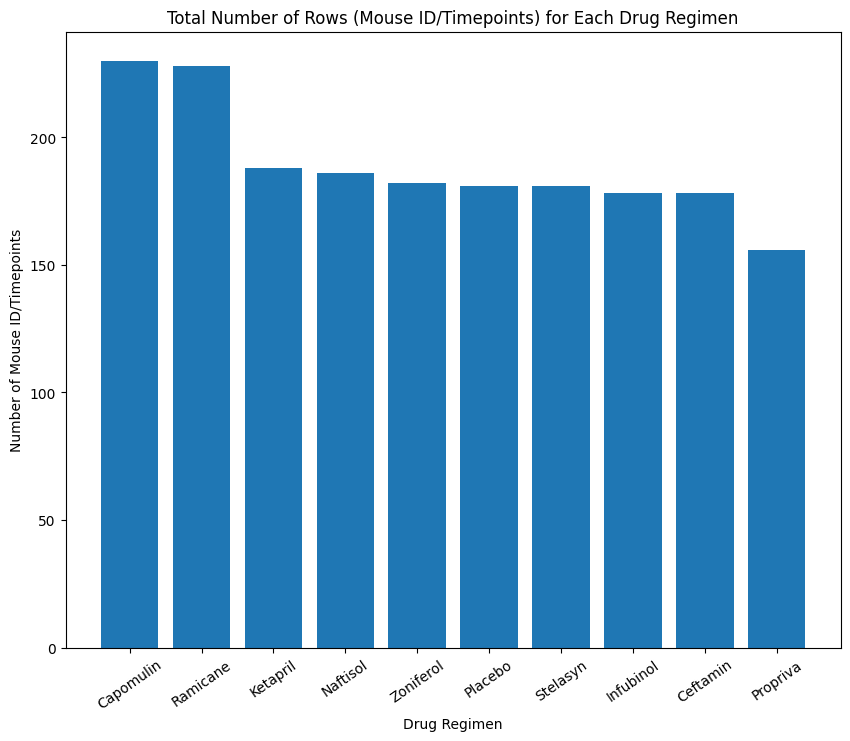

In [885]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(10, 8))
plt.bar(regimen_counts.index, regimen_counts.values)
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse ID/Timepoints')
plt.xticks(rotation=35)  
plt.show()

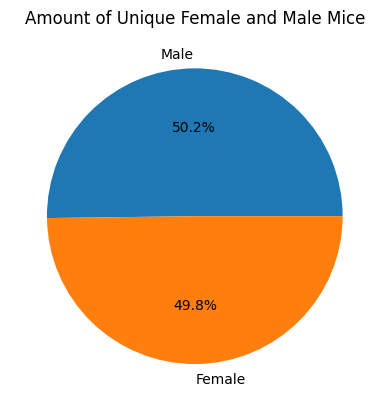

In [886]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
unique_mice = clean_data[['Mouse ID', 'Sex']].drop_duplicates(subset='Mouse ID')
# Get the unique mice with their gender
mice_gender = unique_mice['Sex'].value_counts()

# Make the pie chart
mice_gender.plot(kind='pie', 
    autopct='%1.1f%%', 
    title='Amount of Unique Female and Male Mice', 
    ylabel=''
)
plt.show()

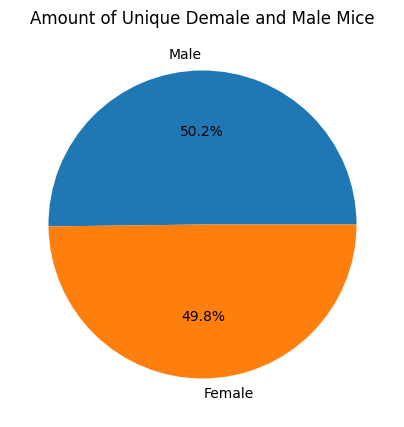

In [887]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = clean_data[['Mouse ID', 'Sex']].drop_duplicates(subset='Mouse ID')
mice_gender_counts = unique_mice['Sex'].value_counts()

# Make the pie chart
plt.figure(figsize=(5,5))
plt.pie(
    mice_gender_counts,
    labels=mice_gender_counts.index,
    autopct='%1.1f%%',
)
plt.title('Amount of Unique Demale and Male Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [888]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoints, clean_data, on=['Mouse ID', 'Timepoint'], how='left')


In [889]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Caftmin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = merged_data.loc[merged_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']

    # add subset
    tumor_volume_data.append(tumor_volumes)

    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

C:\Users\Jrp01\AppData\Local\Temp\ipykernel_7136\2159174130.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_volume_data, labels=treatments)


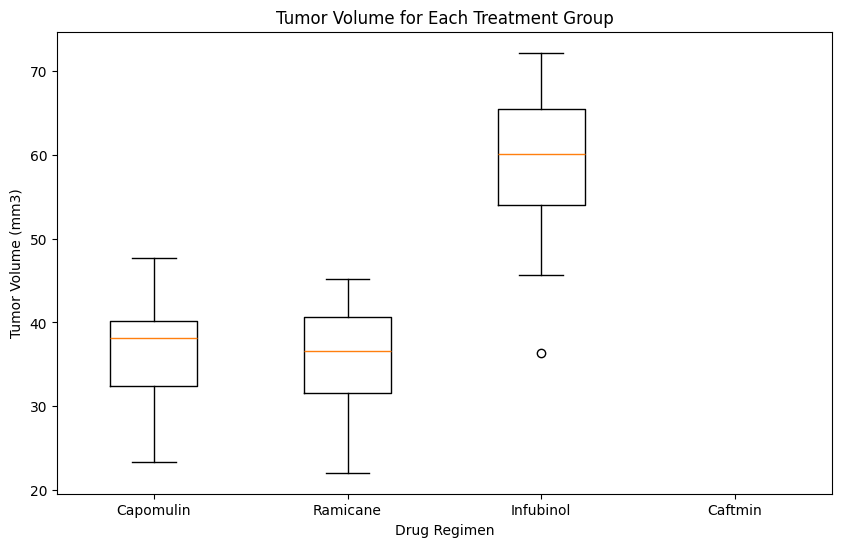

In [890]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_data, labels=treatments)

# Adding title and labels
plt.title('Tumor Volume for Each Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')

# Show the box plot
plt.show()

## Line and Scatter Plots

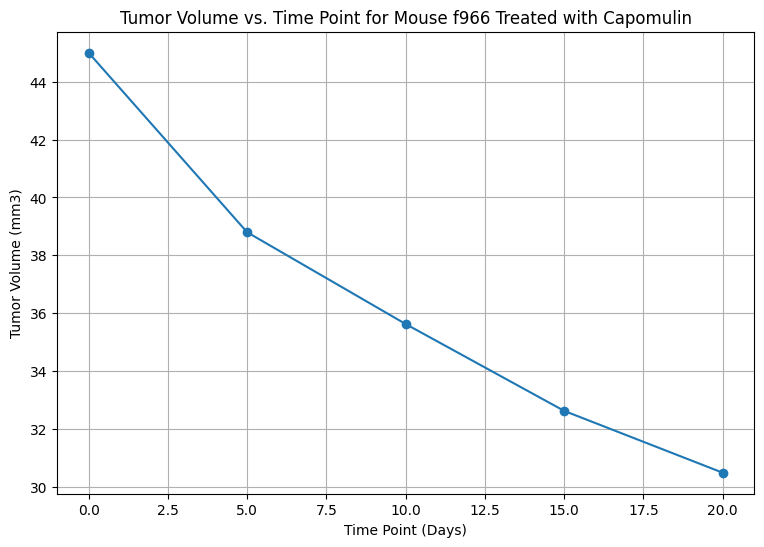

In [891]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Select a single mouse treated with Capomulin
mouse_id = 'f966'
single_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

# Line plot
plt.figure(figsize=(9, 6))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o')
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} Treated with Capomulin')
plt.xlabel('Time Point (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()
plt.show()

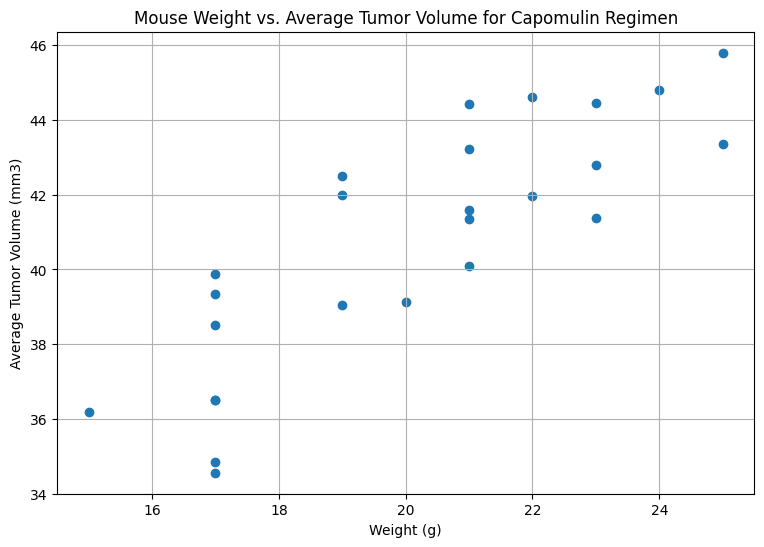

In [892]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
mouse_weight = capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates()
capomulin_summary = pd.merge(avg_tumor_volume, mouse_weight, on='Mouse ID')

# Scatter plot
plt.figure(figsize=(9, 6))
plt.scatter(capomulin_summary['Weight (g)'], capomulin_summary['Tumor Volume (mm3)'])
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid()
plt.show()

## Correlation and Regression

Correlation coefficient between mouse weight and average tumor volume: 0.84
Linear regression model: y = 0.95x + 21.55
R-squared: 0.71


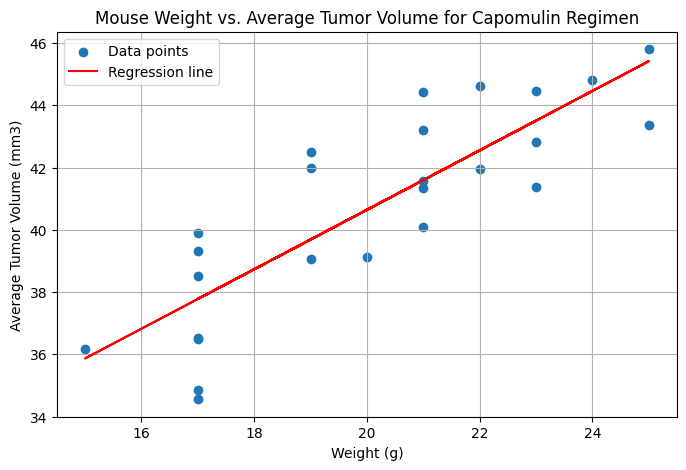

In [893]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Correlation
correlation = st.pearsonr(capomulin_summary['Weight (g)'], capomulin_summary['Tumor Volume (mm3)'])[0]
print(f"Correlation coefficient between mouse weight and average tumor volume: {correlation:.2f}")

# Linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(capomulin_summary['Weight (g)'], capomulin_summary['Tumor Volume (mm3)'])
print(f"Linear regression model: y = {slope:.2f}x + {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")

# Scatter plot and add regression line
plt.figure(figsize=(8, 5))
plt.scatter(capomulin_summary['Weight (g)'], capomulin_summary['Tumor Volume (mm3)'], label='Data points')
plt.plot(capomulin_summary['Weight (g)'], slope * capomulin_summary['Weight (g)'] + intercept, color='red', label='Regression line')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.grid()
plt.show()